<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/semdumizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao_2020 = pd.read_csv(
   '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', 
    error_bad_lines=False, 
    sep = ";", 
    encoding = 'ISO-8859-1',
   usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002", "Q006", "Q025"]
) 

# Transforma a variável TP_SEXO em binária
#educacao_2020 = pd.get_dummies(educacao_2020, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2020['TP_COR_RACA'] = educacao_2020['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2020 = educacao_2020.dropna()

# Carrega o dataframe de 2011
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', 'Q002','Q003', 'Q005'])

# Transforma a variável TP_SEXO em binária
#educacao_2011 = pd.get_dummies(educacao_2011, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2011['TP_COR_RACA'] = educacao_2011['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2011 = educacao_2011.dropna()

# Carrega o dataframe de 2018
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', "Q001", "Q002", "Q006", "Q025"])

# Transforma a variável TP_SEXO em binária
#educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()




Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.7 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=49d6e057d1d1e5b5fd0768615830c217732eab4ba8972d12c7f88000a6cc68a5
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


<ipython-input-1-3b0b9e6294ce>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2020 = pd.read_csv(


In [ ]:
educacao_2011 = educacao_2011.rename(columns={'Q002': 'Q001', 'Q003': 'Q002'})


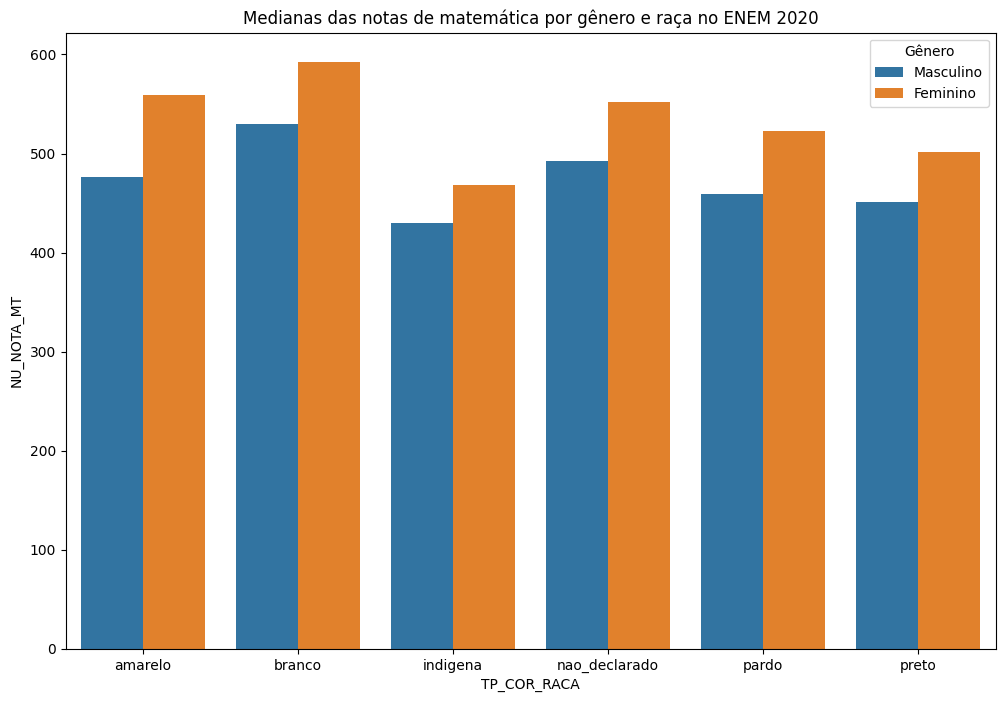

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2020.groupby(['TP_SEXO', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2020')

# Adiciona legenda customizada para TP_SEXO
labels = ['Masculino', 'Feminino']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


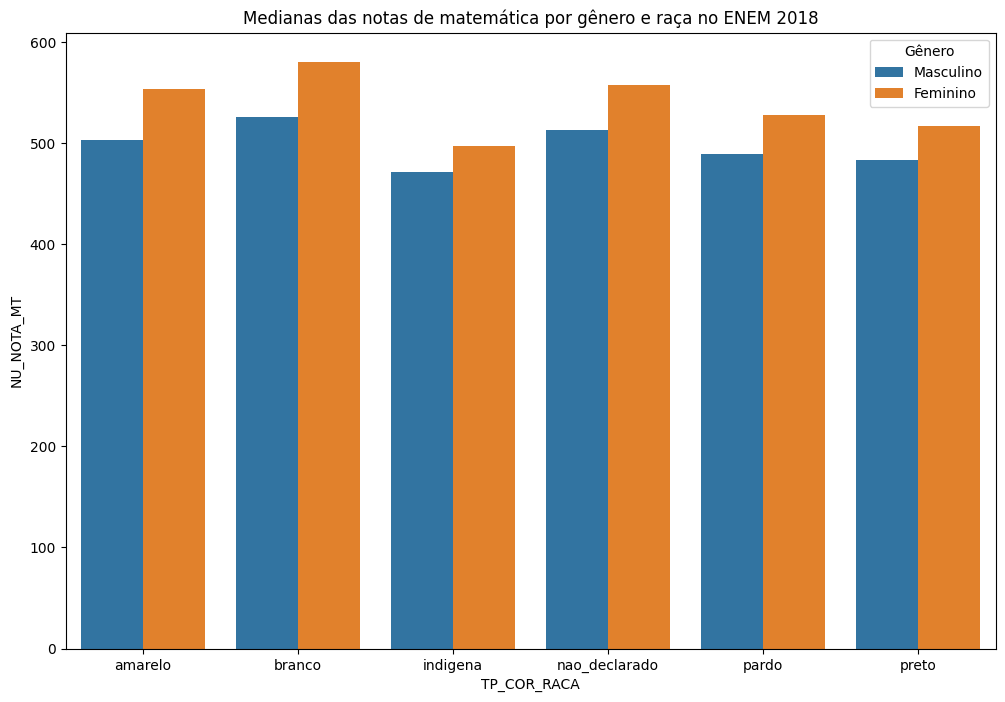

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2018.groupby(['TP_SEXO', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2018')

# Adiciona legenda customizada para TP_SEXO
labels = ['Masculino', 'Feminino']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


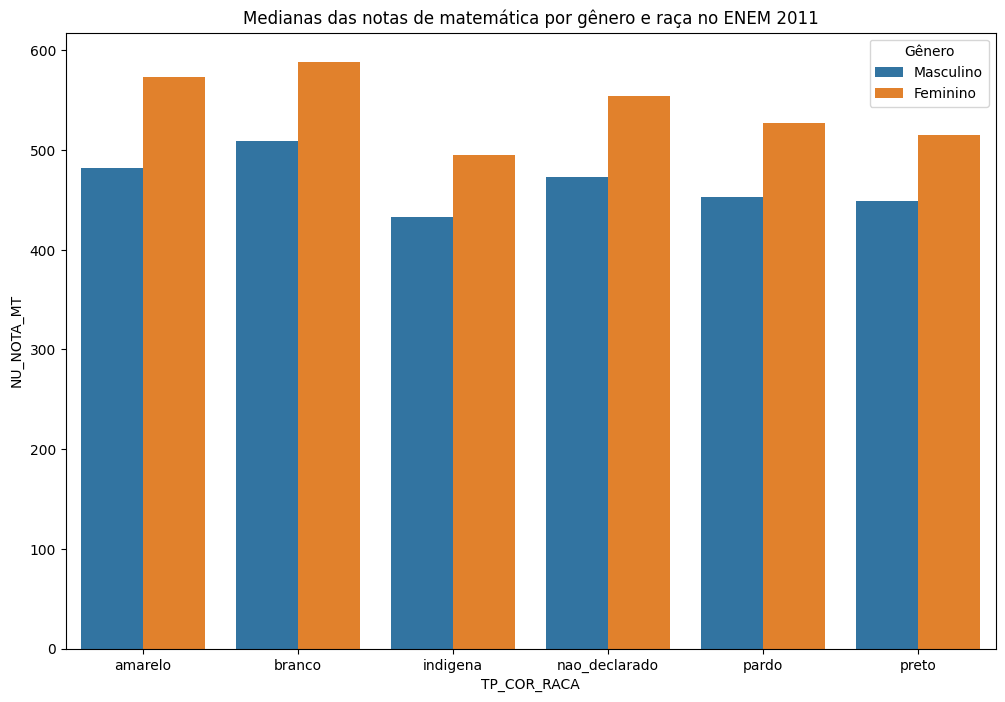

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula as medianas das notas de matemática para cada combinação de gênero e raça
mediana_notas_mat = educacao_2011.groupby(['TP_SEXO', 'TP_COR_RACA'])['NU_NOTA_MT'].median().reset_index()

# Plota o gráfico de barras com as medianas das notas de matemática
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='TP_SEXO', data=mediana_notas_mat, ax=ax)
ax.set_title('Medianas das notas de matemática por gênero e raça no ENEM 2011')

# Adiciona legenda customizada para TP_SEXO
labels = ['Masculino', 'Feminino']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


In [ ]:
score_mean = educacao_2011.groupby('TP_COR_RACA')['NU_NOTA_MT'].mean()


In [ ]:
score_diff = score_mean - score_mean[1]


In [ ]:
score_diff = score_diff.reset_index()


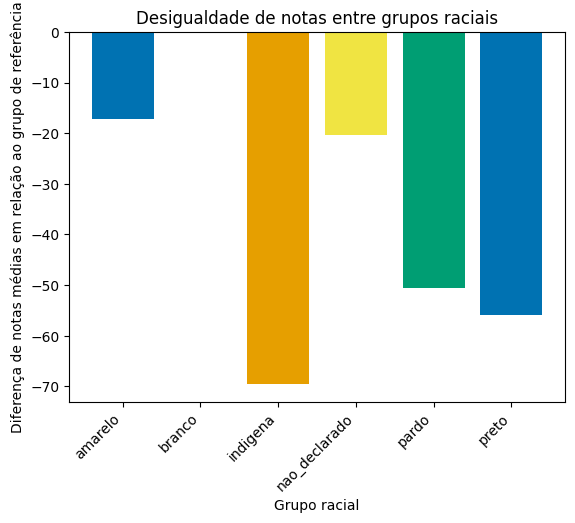

In [ ]:
import matplotlib.pyplot as plt

plt.bar(score_diff['TP_COR_RACA'], score_diff['NU_NOTA_MT'], color=['#0072B2', '#D55E00', '#E69F00', '#F0E442', '#009E73'])
plt.title('Desigualdade de notas entre grupos raciais')
plt.xlabel('Grupo racial')
plt.ylabel('Diferença de notas médias em relação ao grupo de referência')
plt.xticks(rotation=45, ha='right')

plt.show()


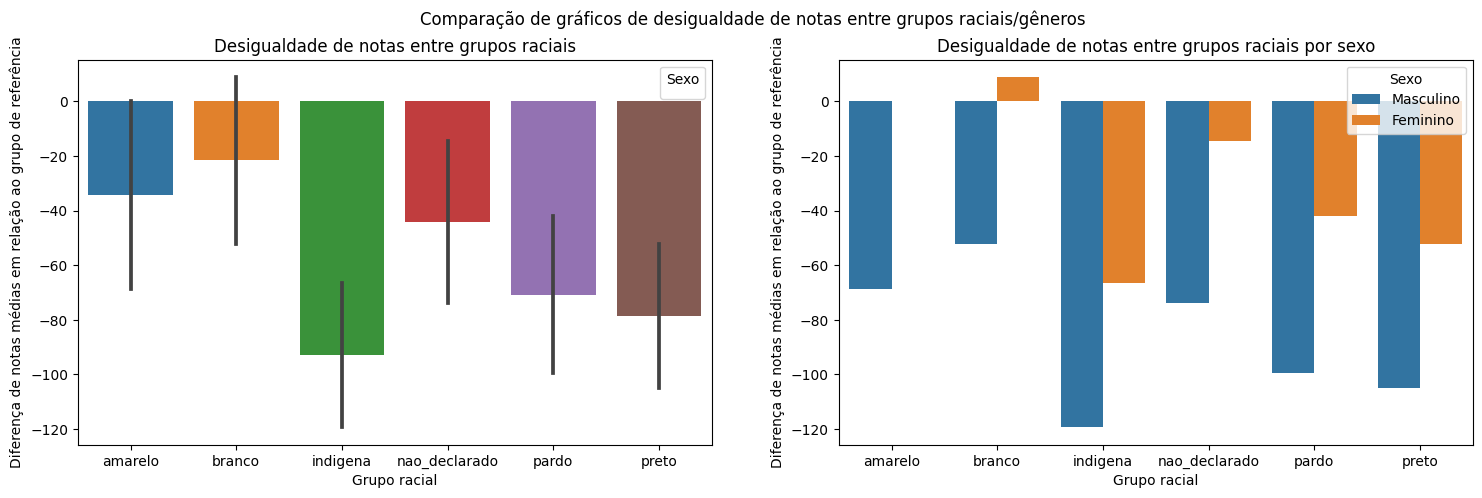

In [ ]:
# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2011.groupby(['TP_COR_RACA', 'TP_SEXO'])['NU_NOTA_MT'].mean()

# Calcular a diferença de notas médias em relação ao grupo de referência
score_diff = score_mean - score_mean[1]

# Resetar o índice para transformar o MultiIndex em colunas
score_diff = score_diff.reset_index()                                                                                                                                                     
# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", data=score_diff, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", hue="TP_SEXO", data=score_diff, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação ao grupo de referência")
    ax.legend(title="", loc="upper right")

    # Adiciona legenda customizada para TP_SEXO
    labels = ['Masculino', 'Feminino']
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Sexo', loc='upper right')

plt.show()


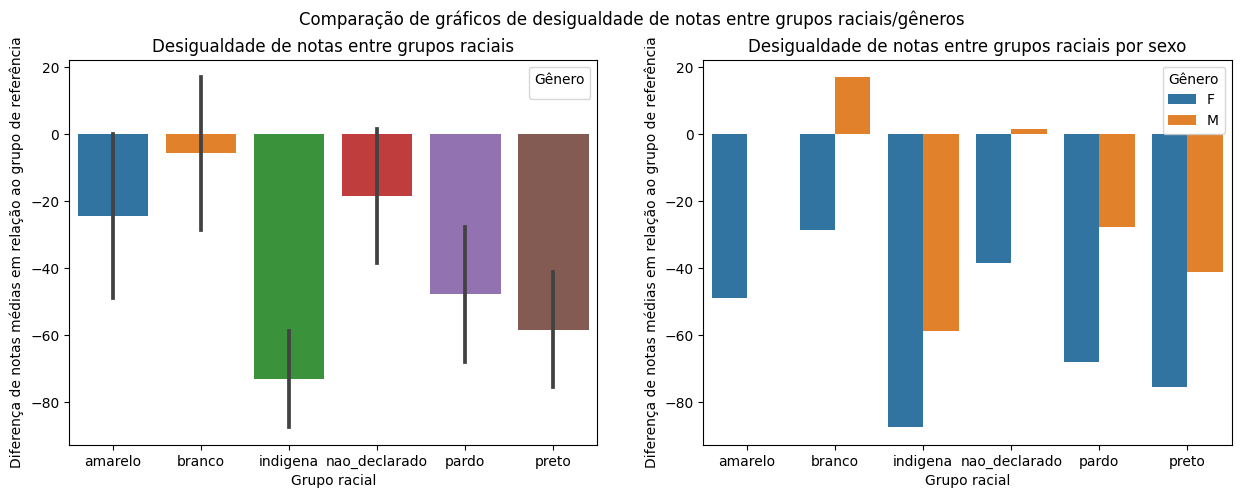

In [ ]:
# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2018.groupby(['TP_COR_RACA', 'TP_SEXO'])['NU_NOTA_MT'].mean()

# Calcular a diferença de notas médias em relação ao grupo de referência
score_diff = score_mean - score_mean[1]

# Resetar o índice para transformar o MultiIndex em colunas
score_diff = score_diff.reset_index()

# Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", data=score_diff, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", hue="TP_SEXO", data=score_diff, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação ao grupo de referência")
    ax.legend(title="Gênero", loc="upper right")

plt.show()


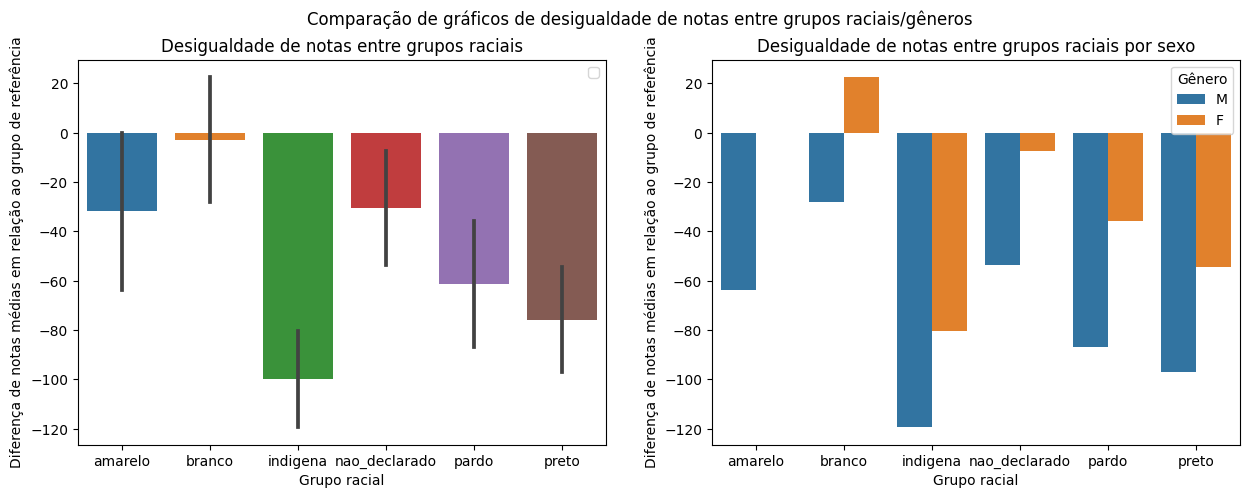

In [ ]:
# Calcular as notas médias por grupo racial/gênero
score_mean = educacao_2020.groupby(['TP_COR_RACA', 'TP_SEXO'])['NU_NOTA_MT'].mean()

# Calcular a diferença de notas médias em relação ao grupo de referência
score_diff = score_mean - score_mean[1]

# Resetar o índice para transformar o MultiIndex em colunas
score_diff = score_diff.reset_index()                                                                                                                                                     # Plotar os dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico sem separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", data=score_diff, ax=axs[0])
axs[0].set_title("Desigualdade de notas entre grupos raciais")

# Gráfico com separação por sexo
sns.barplot(x="TP_COR_RACA", y="NU_NOTA_MT", hue="TP_SEXO", data=score_diff, ax=axs[1])
axs[1].set_title("Desigualdade de notas entre grupos raciais por sexo")

# Adicionar título e rótulos dos eixos
fig.suptitle("Comparação de gráficos de desigualdade de notas entre grupos raciais/gêneros")
for ax in axs:
    ax.set_xlabel("Grupo racial")
    ax.set_ylabel("Diferença de notas médias em relação ao grupo de referência")
    ax.legend(title="", loc="upper right")

# Adiciona legenda customizada para TP_SEXO
labels = ['M', 'F']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gênero', loc='upper right')

plt.show()


### DESIGUALDADE COMR REFERENCIA AO GRUPO BRANCO HOMEM

In [ ]:
# Carrega os dados de 2020
educacao_2020 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
                            error_bad_lines=False,
                            sep=';',
                            encoding='ISO-8859-1',
                            usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA'])

# Transforma a variável TP_SEXO em binária
educacao_2020 = pd.get_dummies(educacao_2020, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2020['TP_COR_RACA'] = educacao_2020['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2020 = educacao_2020.dropna()

# Agrupa os dados por sexo e raça e calcula a mediana das notas de matemática
median_scores_2020 = educacao_2020.groupby(['TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA'])['NU_NOTA_MT'].median()

# Mostra as medianas para cada grupo
print(median_scores_2020)


# Carrega os dados de 2011
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv',
                            sep=';',
                            encoding='ISO-8859-1',
                            usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA'])

# Transforma a variável TP_SEXO em binária
educacao_2011 = pd.get_dummies(educacao_2011, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2011['TP_COR_RACA'] = educacao_2011['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2011 = educacao_2011.dropna()

# Agrupa os dados por sexo e raça e calcula a mediana das notas de matemática
median_scores_2011 = educacao_2011.groupby(['TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA'])['NU_NOTA_MT'].median()

# Mostra as medianas para cada grupo
print(median_scores_2011)


<ipython-input-13-3fce1e929c23>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2020 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',


TP_SEXO_F  TP_SEXO_M  TP_COR_RACA  
0          1          amarelo          558.5
                      branco           592.0
                      indigena         468.1
                      nao_declarado    551.8
                      pardo            522.0
                      preto            501.1
1          0          amarelo          476.1
                      branco           528.8
                      indigena         429.8
                      nao_declarado    491.6
                      pardo            459.4
                      preto            450.9
Name: NU_NOTA_MT, dtype: float64
TP_SEXO_F  TP_SEXO_M  TP_COR_RACA  
0          1          amarelo          573.10
                      branco           588.10
                      indigena         495.20
                      nao_declarado    554.20
                      pardo            526.60
                      preto            514.70
1          0          amarelo          482.25
                      branco     

In [ ]:
# Carrega os dados de 2018
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv',
                            sep=';',
                            encoding='ISO-8859-1',
                            usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA'])

# Transforma a variável TP_SEXO em binária
educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()

# Agrupa os dados por sexo e raça e calcula a mediana das notas de matemática
median_scores_2018 = educacao_2018.groupby(['TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA'])['NU_NOTA_MT'].median()

# Mostra as medianas para cada grupo
print(median_scores_2018)


TP_SEXO_F  TP_SEXO_M  TP_COR_RACA  
0          1          amarelo          553.20
                      branco           580.00
                      indigena         496.95
                      nao_declarado    556.50
                      pardo            528.00
                      preto            516.40
1          0          amarelo          503.10
                      branco           525.90
                      indigena         470.90
                      nao_declarado    513.00
                      pardo            488.90
                      preto            482.90
Name: NU_NOTA_MT, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Cria uma lista com as medianas de cada grupo em 2020, 2018 e 2011
median_scores = [median_scores_2011.values, median_scores_2018.values, median_scores_2020.values]

# Define o nome dos grupos e das medianas
groups = ['Feminino Branco', 'Masculino Branco', 'Feminino Negro', 'Masculino Negro', 'Feminino Indígena', 'Masculino Indígena', 'Feminino Amarelo', 'Masculino Amarelo', 'Feminino Pardo', 'Masculino Pardo']
labels = ['2011', '2018', '2020']

# Cria uma figura com cinco subplots (um para cada grupo)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

# Define o título da figura
fig.suptitle('Medianas da nota de matemática por sexo e raça')

# Cria um loop para cada subplot (grupo e ano)
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Define os dados e as cores para as barras
        data = median_scores[j][i*3:(i+1)*3]
        colors = ['#2C3E50', '#E74C3C', '#3498DB']
        
        # Cria um loop para cada grupo e plota a barra correspondente
        for k in range(3):
            ax.bar(k, data[k], color=colors[k%3], label=labels[k])
        
        # Define o título e os rótulos do eixo x
        ax.set_title(groups[i*2+j])
        ax.set_xticks(range(3))
        ax.set_xticklabels(labels)
        
        # Define o rótulo do eixo y
        ax.set_ylabel('Mediana da nota de matemática')
        
        # Adiciona a legenda
        ax.legend()a
        
plt.subplots_adjust(hspace=0.5)

# Exibe o gráfico
plt.show()


SyntaxError: ignored

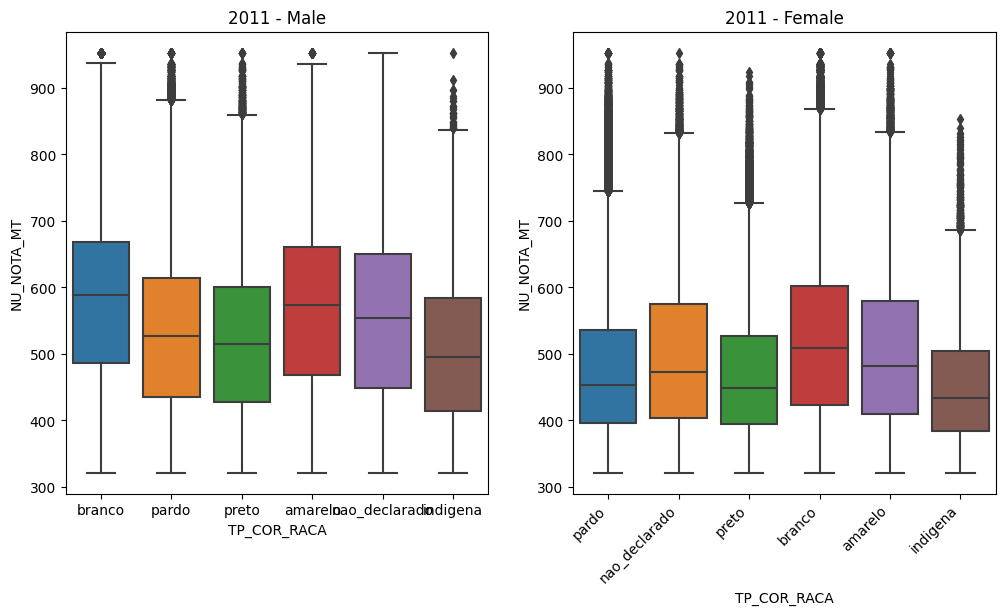

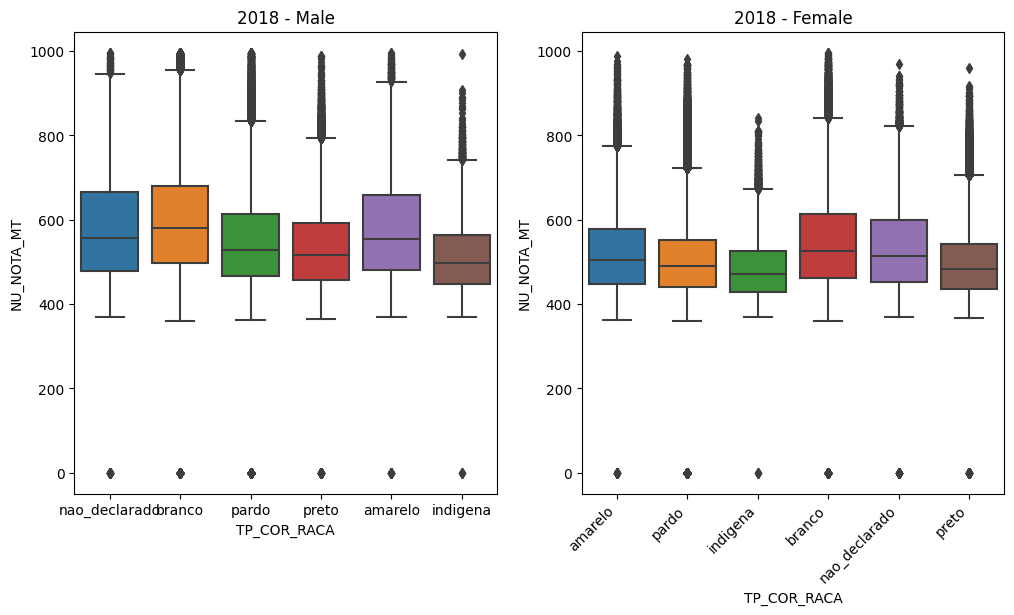

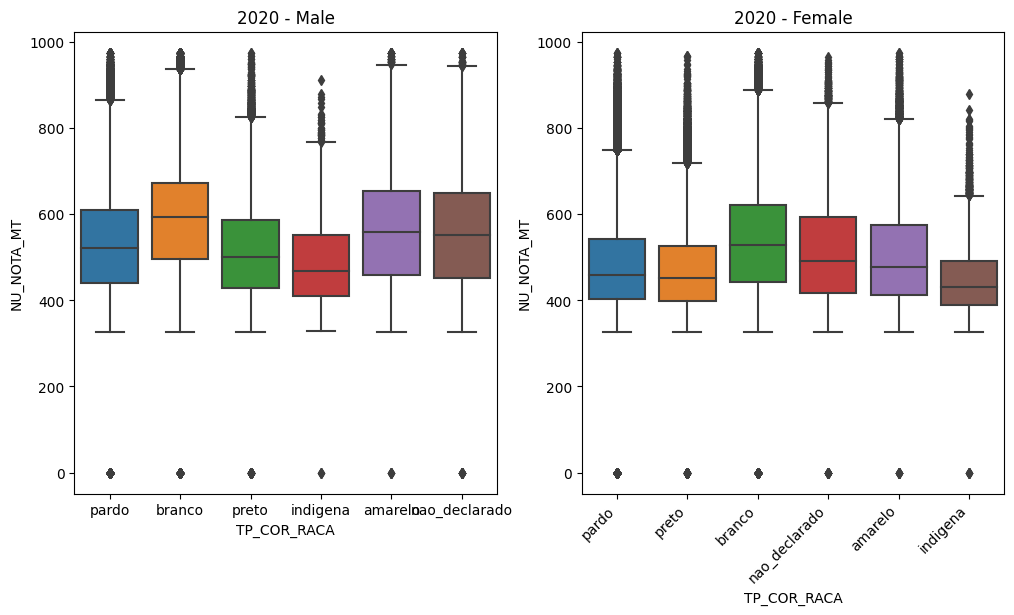

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate data by gender
male_2011 = educacao_2011[educacao_2011['TP_SEXO_M'] == 1]
female_2011 = educacao_2011[educacao_2011['TP_SEXO_M'] == 0]

male_2018 = educacao_2018[educacao_2018['TP_SEXO_M'] == 1]
female_2018 = educacao_2018[educacao_2018['TP_SEXO_M'] == 0]


male_2020 = educacao_2020[educacao_2020['TP_SEXO_M'] == 1]
female_2020 = educacao_2020[educacao_2020['TP_SEXO_M'] == 0]

# Plot boxplots for 2011
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=male_2011, ax=ax[0])
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=female_2011, ax=ax[1])
ax[0].set_title('2011 - Male')
plt.xticks(rotation=45, ha='right')

ax[1].set_title('2011 - Female')
plt.xticks(rotation=45, ha='right')

plt.show()

# Plot boxplots for 2018
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=male_2018, ax=ax[0])
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=female_2018, ax=ax[1])
ax[0].set_title('2018 - Male')
plt.xticks(rotation=45, ha='right')

ax[1].set_title('2018 - Female')
plt.xticks(rotation=45, ha='right')

plt.show()

# Plot boxplots for 2020
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=male_2020, ax=ax[0])
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=female_2020, ax=ax[1])
ax[0].set_title('2020 - Male')
plt.xticks(rotation=45, ha='right')

ax[1].set_title('2020 - Female')
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Cria uma lista com as medianas de cada grupo em 2020, 2018 e 2011
median_scores = [median_scores_2011.values, median_scores_2018.values, median_scores_2020.values]

# Define o nome dos grupos e das medianas
groups = ['Feminino Branco', 'Masculino Branco', 'Feminino Negro', 'Masculino Negro', 'Feminino Indígena', 'Masculino Indígena', 'Feminino Amarelo', 'Masculino Amarelo', 'Feminino Pardo', 'Masculino Pardo']
labels = ['2011', '2018', '2020']

# Cria uma figura com cinco subplots (um para cada grupo)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

# Define o título da figura
fig.suptitle('Medianas da nota de matemática por sexo e raça')

# Cria um loop para cada subplot (grupo e ano)
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Define os dados e as cores para as barras
        data = median_scores[j][i*3:(i+1)*3]
        colors = ['#2C3E50', '#E74C3C', '#3498DB']
        
        # Cria um loop para cada grupo e plota a barra correspondente
        if len(data) > 0:  # verifica se a lista data não está vazia
            for k in range(3):
                ax.bar(k, data[k], color=colors[k%3], label=labels[k])
        
        # Define o título e os rótulos do eixo x
        ax.set_title(groups[i*2+j])
        ax.set_xticks(range(3))
        ax.set_xticklabels(labels)
        
        # Define o rótulo do eixo y
        ax.set_ylabel('Mediana da nota de matemática')
        
        # Adiciona a legenda
        ax.legend()
        
plt.subplots_adjust(hspace=0.5)

# Exibe o gráfico
plt.show()


KeyboardInterrupt: ignored

IndexError: ignored

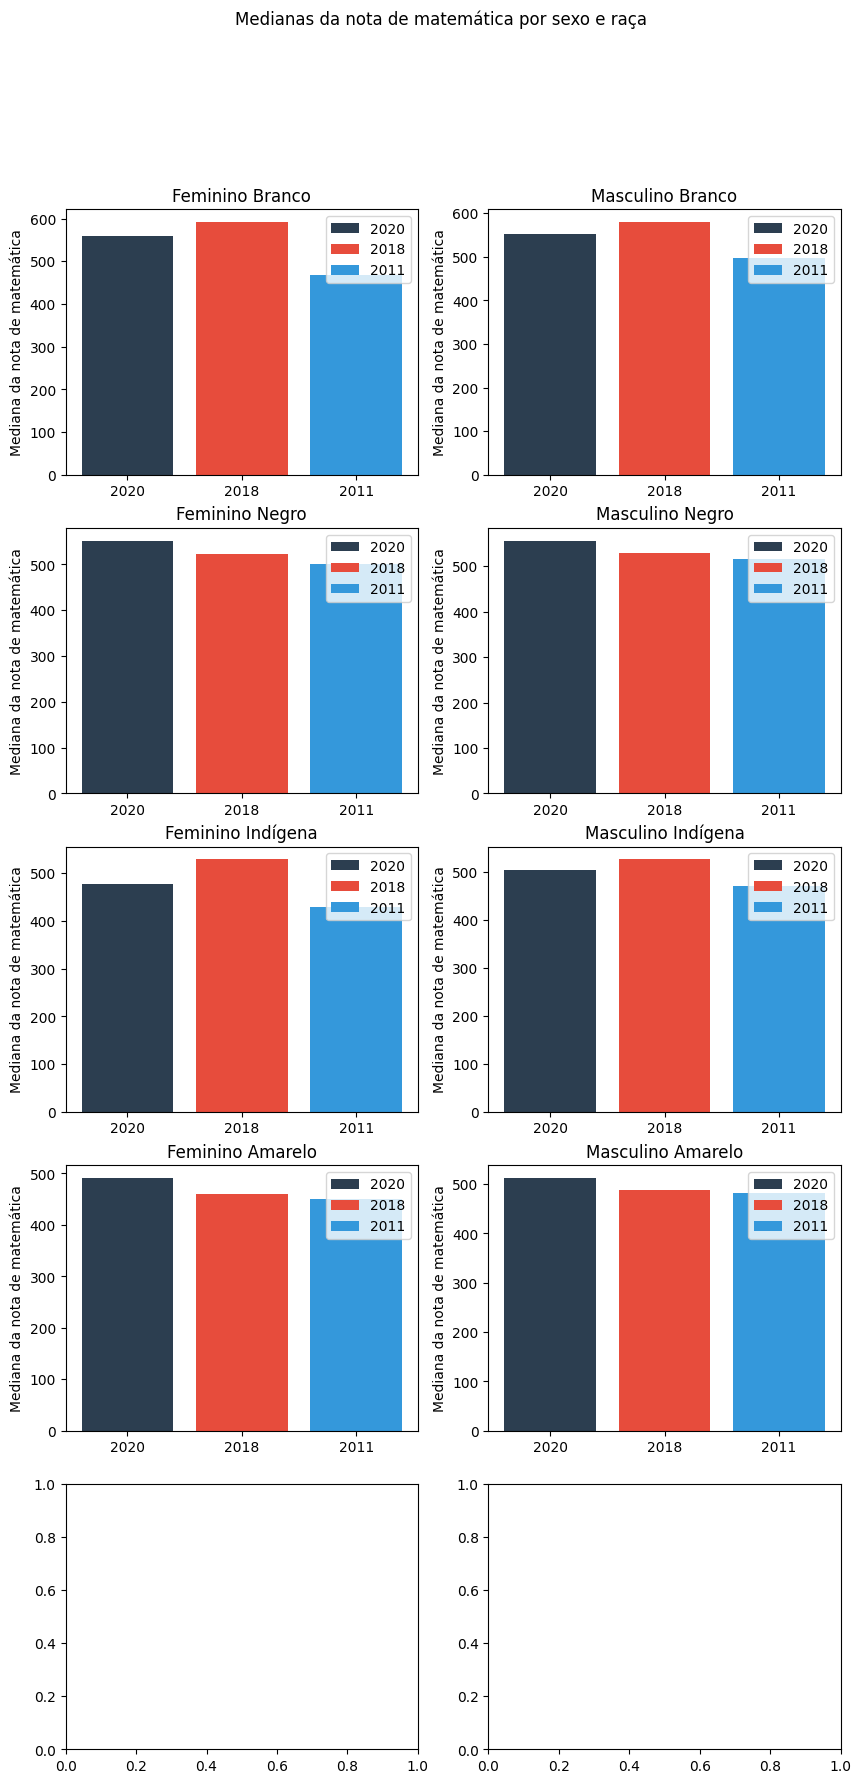

In [ ]:
# Cria uma lista com as medianas de cada grupo em 2020, 2018 e 2011
median_scores = [median_scores_2020.values, median_scores_2018.values, median_scores_2011.values]

# Define o nome dos grupos e das medianas
groups = ['Feminino Branco', 'Masculino Branco', 'Feminino Negro', 'Masculino Negro', 'Feminino Indígena', 'Masculino Indígena', 'Feminino Amarelo', 'Masculino Amarelo', 'Feminino Pardo', 'Masculino Pardo']
labels = ['2020', '2018', '2011']

# Cria uma figura com cinco subplots (um para cada grupo)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

# Define o título da figura
fig.suptitle('Medianas da nota de matemática por sexo e raça')

# Cria um loop para cada subplot (grupo e ano)
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Define os dados e as cores para as barras
        data = median_scores[j][i*3:(i+1)*3]
        colors = ['#2C3E50', '#E74C3C', '#3498DB']
        
        # Cria um loop para cada grupo e plota a barra correspondente
        for k in range(3):
            ax.bar(k, data[k], color=colors[k%3], label=labels[k])
        
        # Define o título e os rótulos do eixo x
        ax.set_title(groups[i*2+j])
        ax.set_xticks(range(3))
        ax.set_xticklabels(labels)
        
        # Define o rótulo do eixo y
        ax.set_ylabel('Mediana da nota de matemática')
        
        # Adiciona a legenda
        ax.legend()
        
plt.subplots_adjust(hspace=0.5)

# Exibe o gráfico
plt.show()


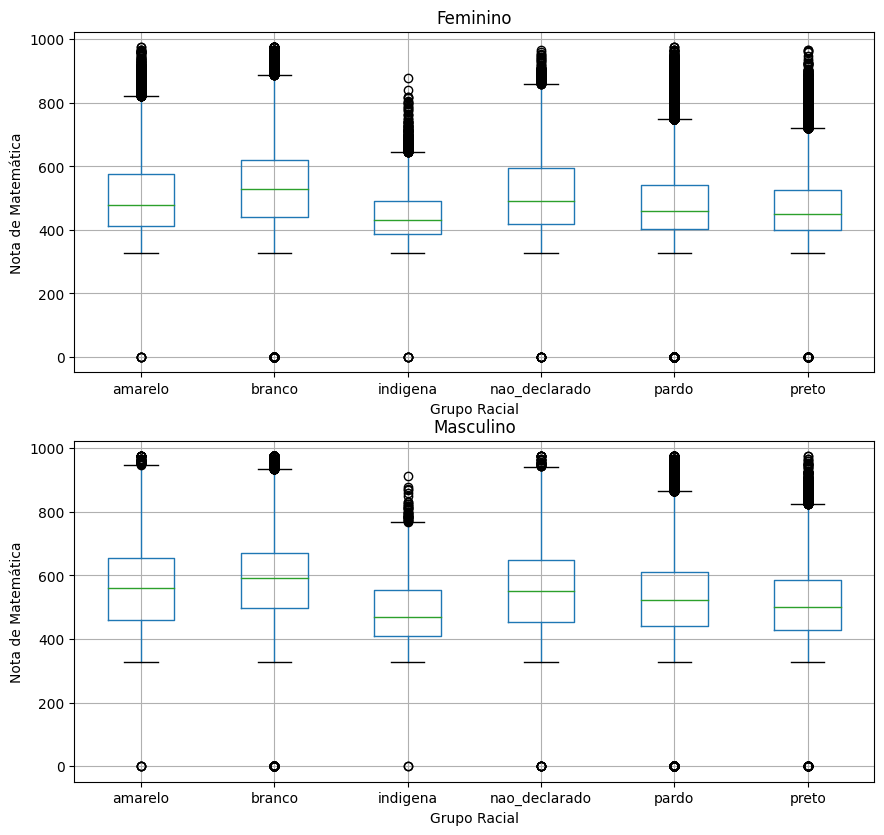

In [ ]:
import matplotlib.pyplot as plt

# Separando por gênero
feminino = educacao_2020.loc[educacao_2020['TP_SEXO'] == 'F']
masculino = educacao_2020.loc[educacao_2020['TP_SEXO'] == 'M']

# Criando os boxplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Boxplots para feminino
feminino.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', ax=axs[0])
axs[0].set_title('Feminino')

# Boxplots para masculino
masculino.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', ax=axs[1])
axs[1].set_title('Masculino')

# Ajustando as legendas
fig.suptitle('')
axs[0].set_xlabel('Grupo Racial')
axs[0].set_ylabel('Nota de Matemática')
axs[1].set_xlabel('Grupo Racial')
axs[1].set_ylabel('Nota de Matemática')

plt.show()


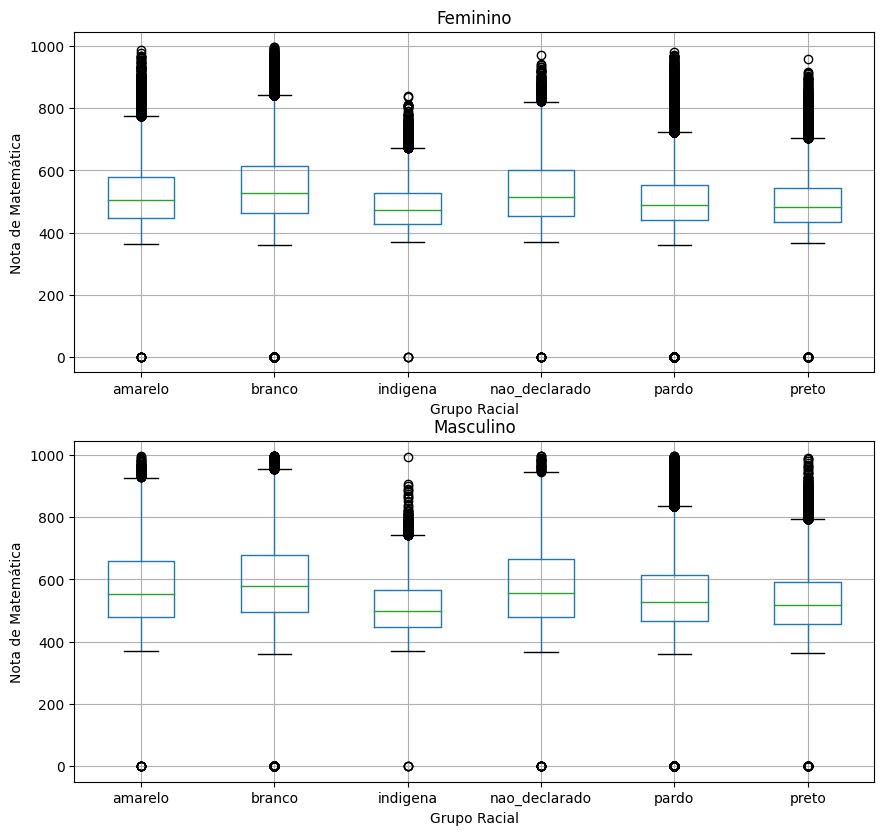

In [ ]:
import matplotlib.pyplot as plt

# Separando por gênero
feminino = educacao_2018.loc[educacao_2018['TP_SEXO'] == 'F']
masculino = educacao_2018.loc[educacao_2018['TP_SEXO'] == 'M']

# Criando os boxplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Boxplots para feminino
feminino.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', ax=axs[0])
axs[0].set_title('Feminino')

# Boxplots para masculino
masculino.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', ax=axs[1])
axs[1].set_title('Masculino')

# Ajustando as legendas
fig.suptitle('')
axs[0].set_xlabel('Grupo Racial')
axs[0].set_ylabel('Nota de Matemática')
axs[1].set_xlabel('Grupo Racial')
axs[1].set_ylabel('Nota de Matemática')

plt.show()


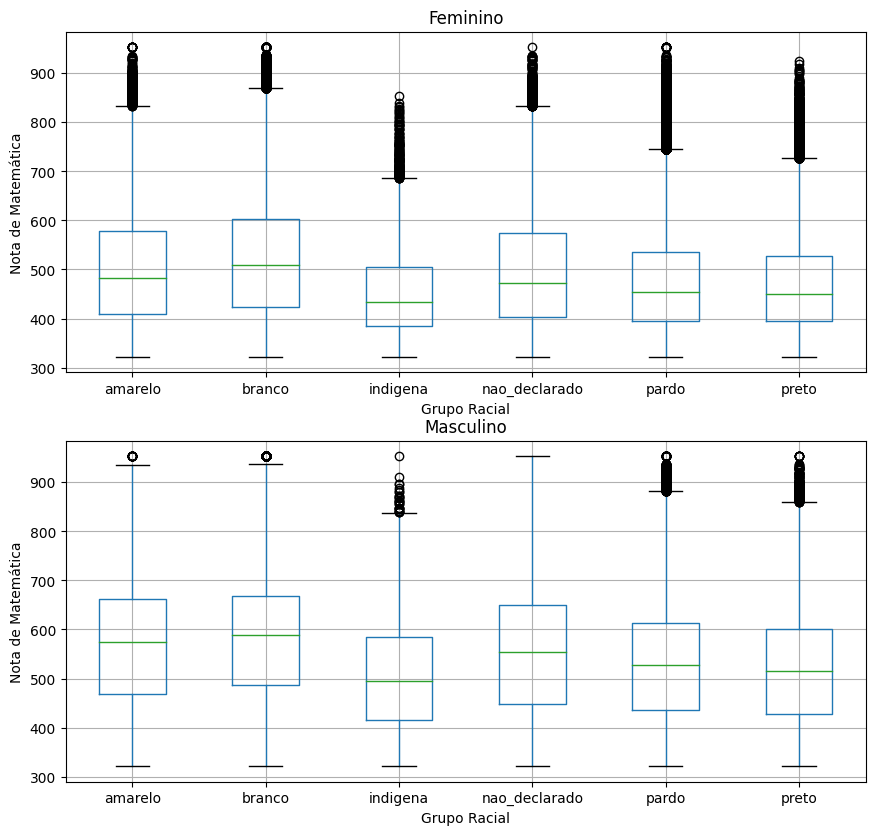

In [ ]:
import matplotlib.pyplot as plt

# Separando por gênero
feminino = educacao_2011.loc[educacao_2011['TP_SEXO'] == 'F']
masculino = educacao_2011.loc[educacao_2011['TP_SEXO'] == 'M']

# Criando os boxplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Boxplots para feminino
feminino.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', ax=axs[0])
axs[0].set_title('Feminino')

# Boxplots para masculino
masculino.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', ax=axs[1])
axs[1].set_title('Masculino')

# Ajustando as legendas
fig.suptitle('')
axs[0].set_xlabel('Grupo Racial')
axs[0].set_ylabel('Nota de Matemática')
axs[1].set_xlabel('Grupo Racial')
axs[1].set_ylabel('Nota de Matemática')

plt.show()


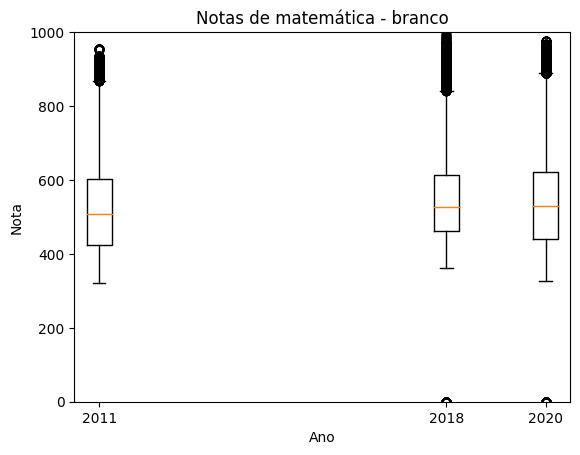

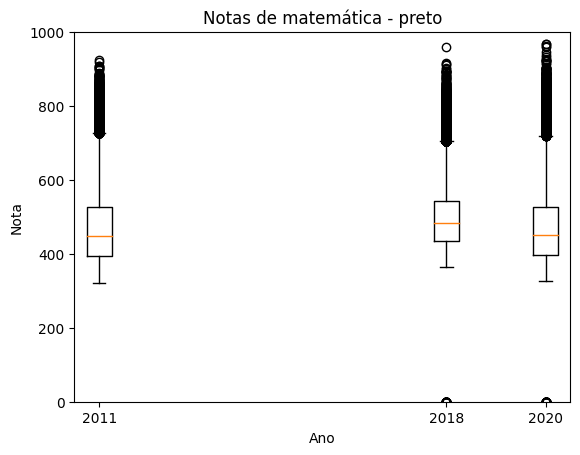

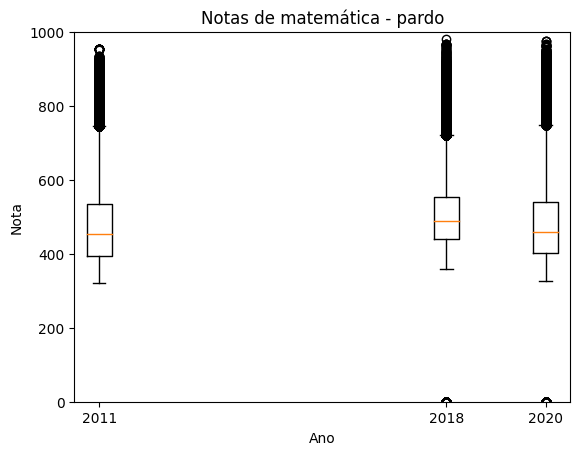

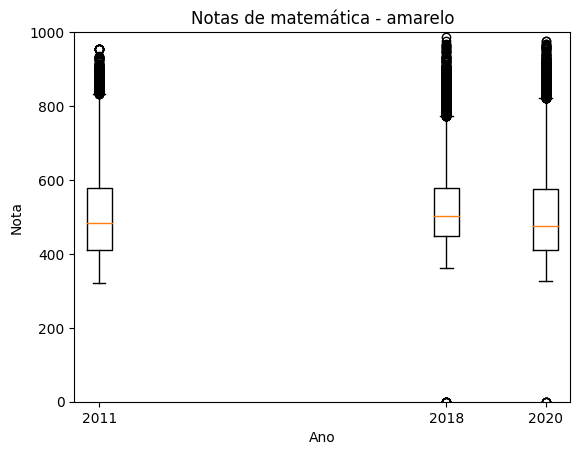

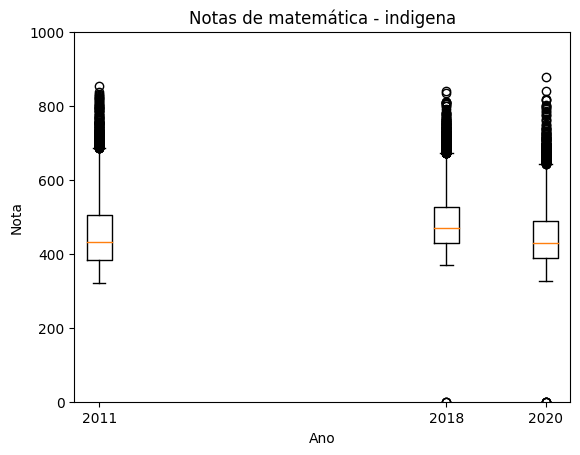

In [ ]:
import matplotlib.pyplot as plt

# Dicionário com os anos como chaves e os dataframes como valores
educacao = {'2011': educacao_2011, '2018': educacao_2018, '2020': educacao_2020}

# Lista com os grupos de cor/raça
grupos = ['branco', 'preto', 'pardo', 'amarelo', 'indigena']

# Loop pelos grupos de cor/raça
for grupo in grupos:
  # Cria uma figura para o grupo atual
  fig, ax = plt.subplots()

  # Loop pelos anos
  for ano in educacao.keys():
    # Seleciona apenas os dados do ano e do sexo feminino
    df = educacao[ano][educacao[ano]['TP_SEXO'] == 'F']
    
    # Seleciona apenas os dados do grupo de cor/raça atual
    df = df[df['TP_COR_RACA'] == grupo]

    # Adiciona um boxplot para o ano atual
    ax.boxplot(df['NU_NOTA_MT'], positions=[int(ano)], widths=0.5)

  # Configurações do gráfico
  ax.set_title(f'Notas de matemática - {grupo}')
  ax.set_xlabel('Ano')
  ax.set_ylabel('Nota')
  ax.set_xticks([2011, 2018, 2020])
  ax.set_xticklabels(['2011', '2018', '2020'])
  ax.set_ylim([0, 1000])

# Mostra os gráficos
plt.show()
